In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [ ]:
from analyse import read_game, plot_hist_win_by_card, plot_hist_winner_by_card

In [ ]:
# df_game_2_1000 = read_game("../data/game_summary/summary_2p_1000g_random_1.json")
# df_game_2_10000 = read_game("../data/game_summary/summary_2p_10000g_random_1.json")
# df_game_3_10000 = read_game("../data/game_summary/summary_3p_10000g_random_1.json")
# df_game_4_10000 = read_game("../data/game_summary/summary_4p_10000g_random_1.json")
# df_game_5_10000 = read_game("../data/game_summary/summary_5p_10000g_random_1.json")
player_list_nn, df_game_nn = read_game("../data/game_summary/summary_3p_1000g_nn_1.json", return_player=True)
# player_list_nn, df_game_nn_10000 = read_game("../data/game_summary/summary_3p_10000g_nn_1.json", return_player=True)
player_list_nn, df_game_nn_10000 = read_game("../data/game_summary/summary_2p_10000g_nn_1.json", return_player=True)

Number of games: 1000
Number of games: 10000


In [ ]:
df_game_2_1000["good"] = df_game_2_1000[["point_card","win"]].apply(lambda row: row["win"] if row["point_card"]>0 else 1-row["win"], axis=1)
df_game_2_1000.head()

,game,turn,point_card,card,player_idx,win,game_winner,good
0,0,0,-1,13,0,0,[1],1
1,0,0,-1,12,1,1,[1],0
2,0,1,-2,8,0,1,[1],0
3,0,1,-2,15,1,0,[1],1
4,0,2,-4,11,0,0,[1],1


In [ ]:
df_winner = df_game_2_1000[
    df_game_2_1000.apply(lambda row: row["player_idx"] in row["game_winner"], axis=1)
]

In [ ]:
group_point_card_card = df_winner.groupby(["point_card", "card"]).size()
mat = pd.DataFrame(group_point_card_card, columns=["size"]).reset_index().pivot(index="point_card", columns="card", values="size")
mat

card,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
point_card,,,,,,,,,,,,,,,
-5,61,56,68,76,66,66,65,57,88,71,71,64,62,85,79
-4,72,71,71,85,64,64,63,54,82,76,66,58,69,80,60
-3,66,73,89,73,75,80,61,62,72,72,58,69,63,53,69
-2,71,92,76,76,76,66,64,65,76,78,65,60,57,55,58
-1,82,82,97,74,58,75,84,73,68,51,59,52,64,48,68
1,85,55,82,68,82,71,55,82,57,78,81,73,44,58,64
2,83,78,65,64,93,74,68,77,50,55,54,77,57,71,69
3,81,80,64,72,71,63,56,78,77,67,64,67,68,66,61
4,84,78,64,65,68,76,91,65,67,56,61,67,78,52,63


(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 <a list of 10 Text major ticklabel objects>)

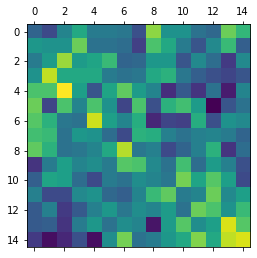

In [ ]:
plt.matshow(mat)
plt.xticks()

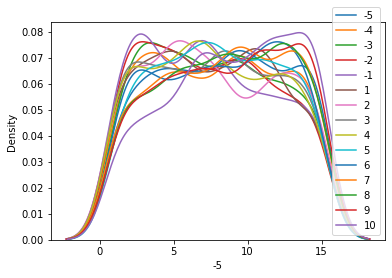

In [ ]:
group_game_point_card_card = pd.pivot_table(df_winner, index="point_card", columns="game", values="card")
# group_game_point_card_card.head()
for line in group_game_point_card_card.index:
    sns.kdeplot(x=group_game_point_card_card.loc[line], label=line)
plt.legend()

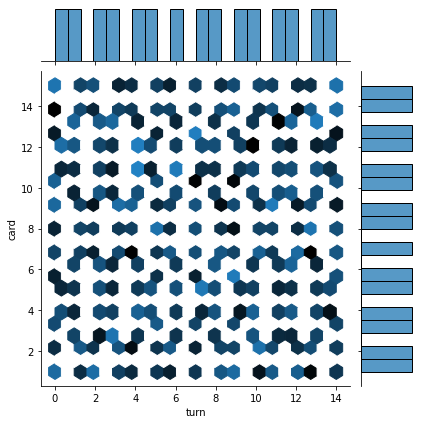

In [ ]:
sns.jointplot(df_winner["turn"], df_winner["card"], kind="hex")

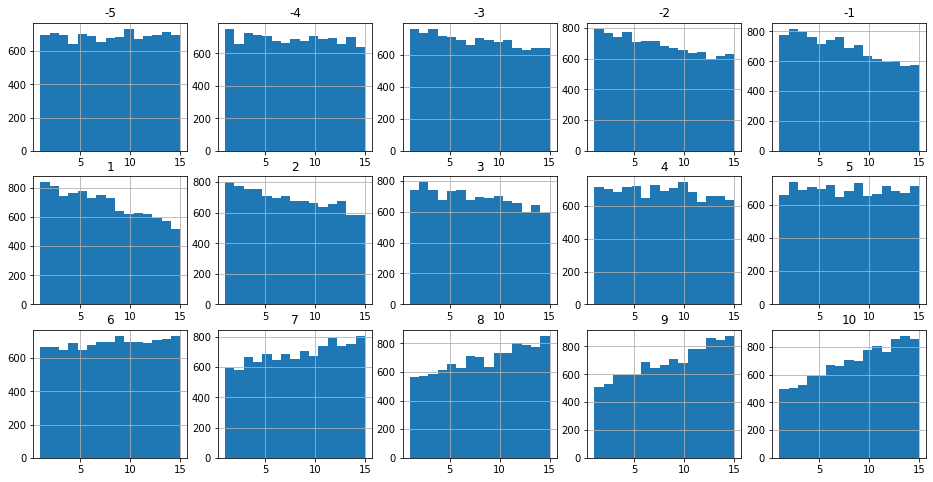

In [ ]:
plot_hist_winner_by_card(df_game_2_10000)

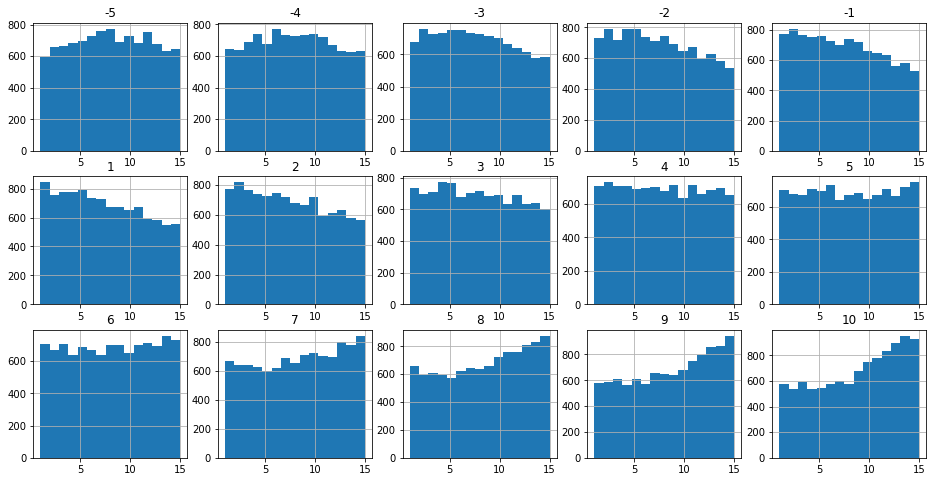

In [ ]:
plot_hist_winner_by_card(df_game_3_10000)

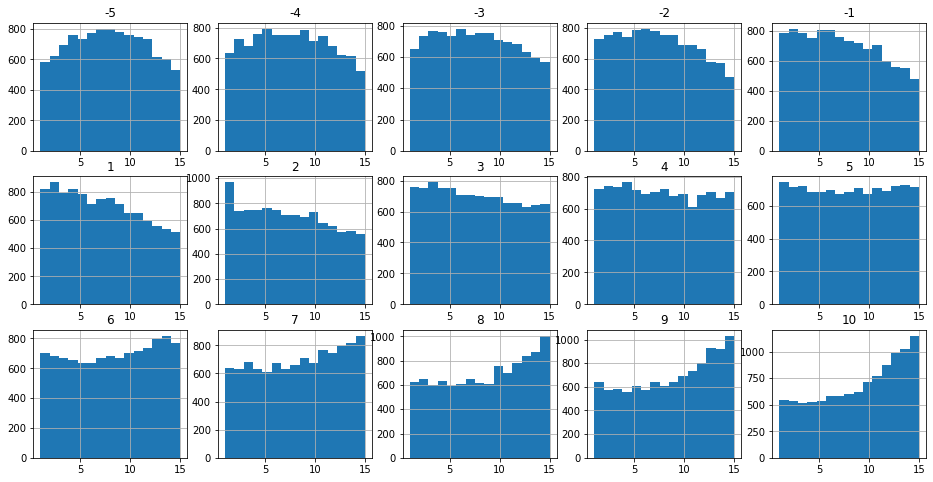

In [ ]:
plot_hist_winner_by_card(df_game_4_10000)

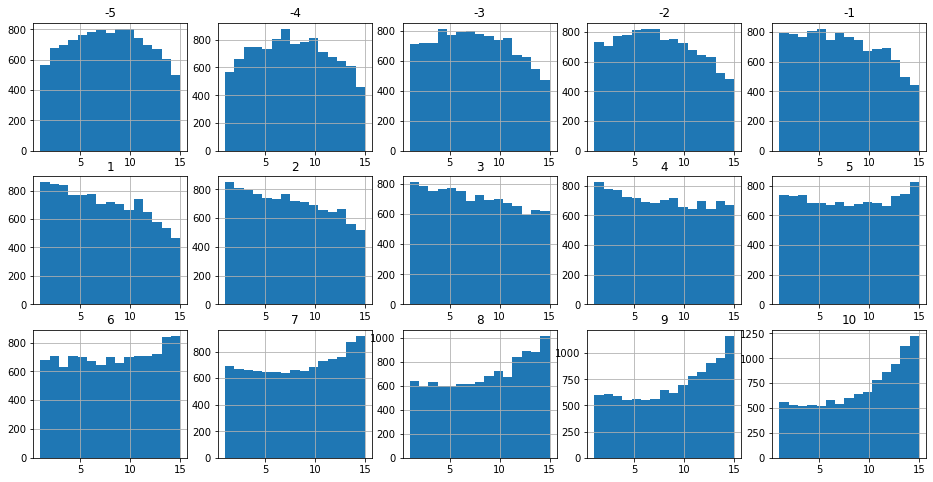

In [ ]:
plot_hist_winner_by_card(df_game_5_10000)

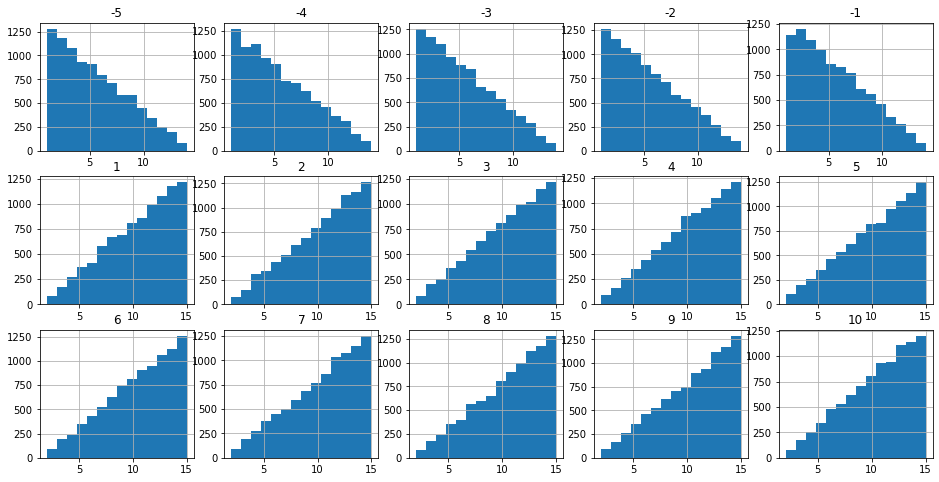

In [ ]:
plot_hist_win_by_card(df_game_2_10000)

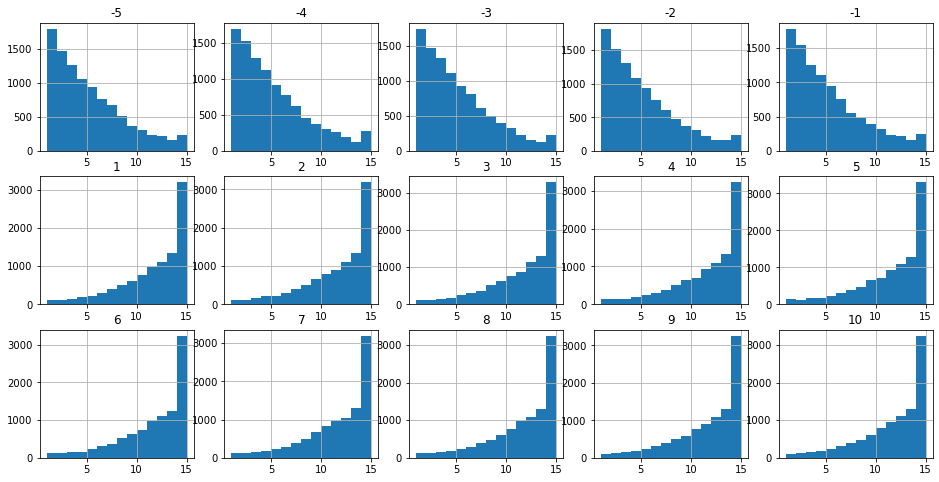

In [ ]:
plot_hist_win_by_card(df_game_3_10000)

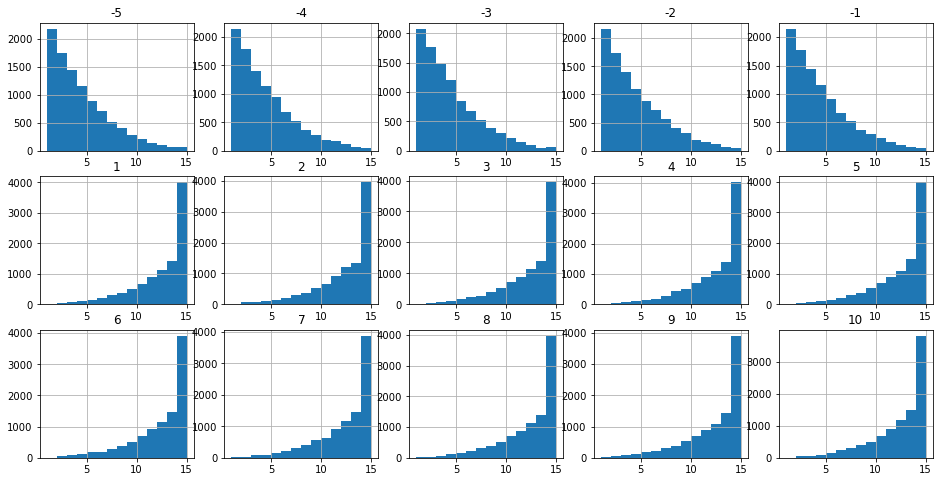

In [ ]:
plot_hist_win_by_card(df_game_4_10000)

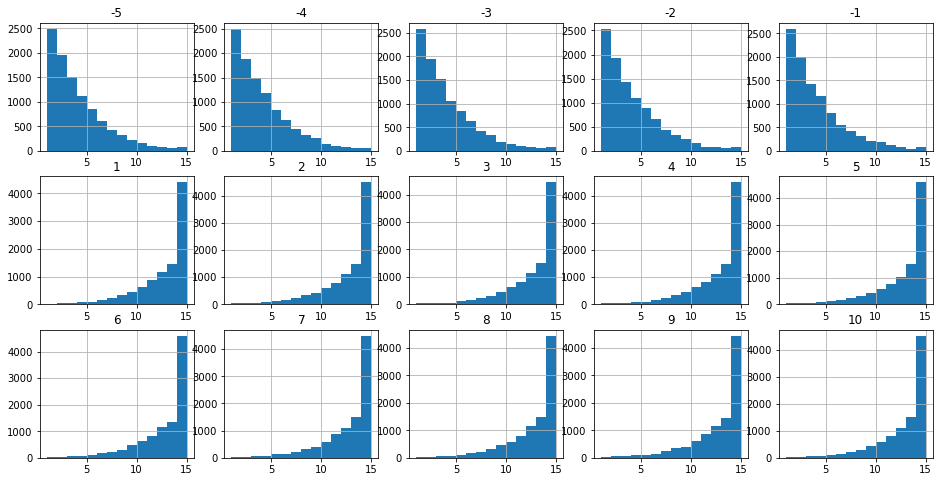

In [ ]:
plot_hist_win_by_card(df_game_5_10000)

In [ ]:
df_nn_clean = df_game_nn_10000[df_game_nn_10000["game_winner"].apply(len) == 1]
df_nn_clean["game_winner"] = df_nn_clean["game_winner"].apply(lambda x: x[0])
df_nn_clean

,game,turn,point_card,card,player_idx,win,game_winner
0,0,0,-1,8,0,1,1
1,0,0,-1,10,1,0,1
2,0,1,8,2,0,0,1
3,0,1,8,5,1,1,1
4,0,2,9,14,0,1,1
...,...,...,...,...,...,...,...
299995,9999,12,1,4,1,0,1
299996,9999,13,-4,13,0,0,1
299997,9999,13,-4,1,1,1,1
299998,9999,14,-5,10,0,1,1


In [ ]:
player_list_nn

['NN Player Tristan', 'RandomPlayer 1']

In [ ]:
df_nn_win = pd.DataFrame(df_nn_clean.groupby("game")["game_winner"].first())
for player in df_nn_win["game_winner"].value_counts().index:
    df_nn_win[f"{player}_won"] = df_nn_win["game_winner"] == player
df_nn_win.head()

,game_winner,0_won,1_won
game,,,
0,1,False,True
1,1,False,True
2,1,False,True
3,0,True,False
4,1,False,True


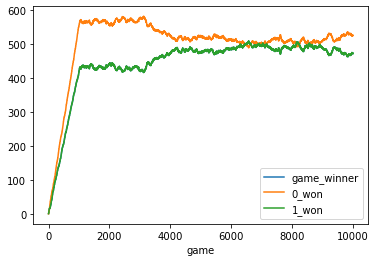

In [ ]:
# (df_nn_win["0_won"].rolling(1000, min_periods=1).sum()/np.minimum(np.arange(1,df_nn_win.shape[0]+1), 1000)).plot()
(df_nn_win.rolling(1000, min_periods=1).sum()).plot()

In [ ]:
with open("weights.pkl","rb") as f:
    weights = pickle.load(f)

In [ ]:
weights

{'A': array([[ 1.00000000e+00,  1.00000000e+00],
        [ 8.22427008e-01,  1.15422601e+00],
        [ 1.11187820e+00,  5.34328709e-01],
        [ 1.37413040e+00,  5.16619792e-01],
        [ 6.14483274e-01,  3.80356629e+00],
        [ 9.44536235e-01,  3.36984734e-01],
        [ 3.32445264e+00,  4.27640903e+00],
        [ 1.44220724e-01,  5.34631035e-01],
        [-3.84106566e+00, -8.56657523e+00],
        [ 1.69449539e+00, -1.10947568e+00],
        [ 7.77969666e-01, -4.01479657e-03],
        [ 1.89572459e+00,  1.93234023e+00],
        [ 1.53869846e+00,  1.09737044e+00],
        [ 5.85785398e-01,  1.01343904e+00],
        [ 1.23049692e+00,  1.13521483e+00]]),
 'b': array([[ 0.00000000e+00],
        [ 1.95066077e-17],
        [-2.25651938e-17],
        [-3.31484560e-17],
        [ 5.96228630e-16],
        [-5.63901279e-17],
        [ 3.88928230e-15],
        [-8.75865362e-17],
        [ 1.39012805e-15],
        [ 1.17381151e-16],
        [ 1.47429425e-16],
        [ 5.96585596e-17],
    

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c3570100-157e-4a3f-b5c9-ebc0870008b3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>